In [2]:
import os
import sys
home_dir = "../../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

(7179, 30)
Index(['mut_id', 'md5', 'pmd_id', 'nr', 'prot_acc_version', 'snp_id',
       'mut_real', 'wt', 'mut', 'prot_pos', 'chrom', 'chrom_pos', 'ref_allele',
       'alt_allele', 'function', 'source', 'crossref', 'function_summarized',
       'class', 'SIFT_score', 'Polyphen2_HVAR_score', 'MetaRNN_score',
       'REVEL_score', 'MVP_score', 'CADD_raw_score',
       'integrated_fitCons_score', 'phyloP17way_primate_score',
       'phastCons17way_primate_score', 'bStatistic_score', 'pred'],
      dtype='object')


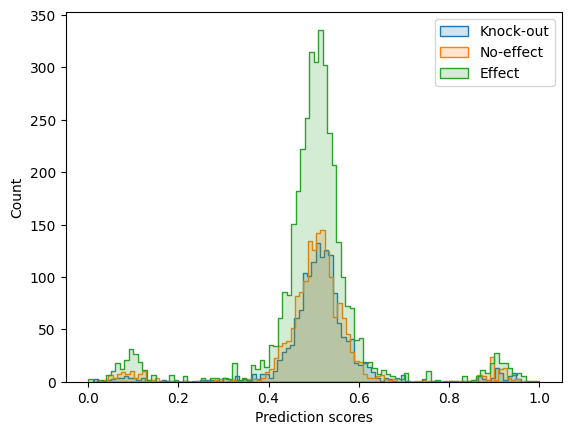

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_distribution(result_df):
    df = result_df.copy(deep=True)
    plt.cla()

    effect = df[df["class"]=="Effect"]
    knock_out = df[df["class"]=="Knock-out"]
    no_effect = df[df["class"]=="No-effect"]
    # print(effect.shape, knock_out.shape, no_effect.shape)
    
    bins = 100 # 20, 100, 500
    
    sns.histplot(knock_out["pred"], bins=bins, label=f"Knock-out", element="step", alpha=.2)
    sns.histplot(no_effect["pred"], bins=bins, label=f"No-effect", element="step", alpha=.2)
    sns.histplot(effect["pred"], bins=bins, label=f"Effect", element="step", alpha=.2)
    # sns.histplot(result_df, x="pred", y="class", element="step", hue="class", bins=bins, alpha=0.2)
    
    plt.legend()
    plt.xlabel("Prediction scores")
    plt.ylabel("Count")
    plt.show()

model_dir = "bioembeddings_dallago"
model_name = "prottrans_t5_xl_u50" # prottrans_t5_xl_u50, prottrans_bert_bfd
result_df = pd.read_csv(home_dir+f"models/{model_dir}/outputs/{model_name}/pmd/preds_{model_name}_masked.tsv", sep="\t")
# result_df = result_df[result_df["crossref"].apply(lambda x: True if "HUMAN" in x else False)] # number of human entries: 16996
model_pred_col = "pred"
result_df["pred"]=(result_df[model_pred_col]-result_df[model_pred_col].min())/(result_df[model_pred_col].max()-result_df[model_pred_col].min()) # scaling prediction scores between [0, 1]
# result_df["pred"]=result_df[model_pred_col]
print(result_df.shape)
print(result_df.columns)
result_df["class"].value_counts()
plot_distribution(result_df)

In [22]:
model_name = "prottrans_t5_xl_u50" # options: prottrans_bert_bfd, prottrans_albert_bfd, prottrans_xlnet_uniref100, prottrans_t5_bfd, prottrans_t5_uniref50, prottrans_t5_xl_u50
result_df = pd.read_csv(home_dir+f"models/bioembeddings_dallago/outputs/popu_freq_preds_{model_name}_(mt-wt).csv", sep="\t")
print(result_df.shape)
result_df[result_df["mt_freq"]==0.0]

(95324, 14)


,snp_id,chrom_acc_version,chrom_pos,ref_allele,alt_allele,prot_acc_version,prot_pos,wt,mut,wt_population,mut_poulation,wt_freq,mt_freq,pred


In [23]:

# normalization effect check: does not effect in the rank correlation at all
print(result_df["mt_freq"].min(), result_df["mt_freq"].max())
processed_result_df = result_df.copy()
processed_result_df["mt_freq"]=(result_df["mt_freq"]-result_df["mt_freq"].min())/(result_df["mt_freq"].max()-result_df["mt_freq"].min())
processed_result_df["pred"]=(result_df["pred"]-result_df["pred"].min())/(result_df["pred"].max()-result_df["pred"].min())

4.873223101026788e-06 0.5


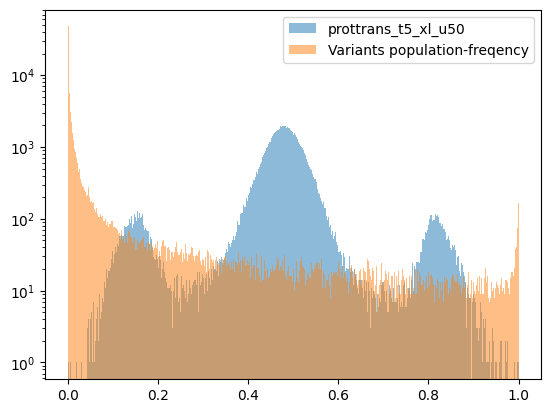

In [24]:
# bins = (np.logspace(0, 1.041392685158225, 500, base=10) - 1) / 10
# plt.hist(processed_result_df["pred"], bins, log=True, density=True, alpha=.5, label="Tape-Rao")
# plt.hist(processed_result_df["mt_freq"], bins, log=True, density=True, alpha=.5, label="Variants population-freqency")
plt.hist(processed_result_df["pred"], bins=500, log=True, alpha=.5, label=model_name)
plt.hist(processed_result_df["mt_freq"], bins=500, log=True, alpha=.5, label="Variants population-freqency")
plt.legend()
plt.show()

In [26]:
print(spearmanr(processed_result_df["pred"], processed_result_df["mt_freq"]))
print(spearmanr(result_df["pred"], result_df["mt_freq"]))
print(pearsonr(result_df["pred"], result_df["mt_freq"]))

SignificanceResult(statistic=0.016885666645134523, pvalue=1.8512791217508599e-07)
SignificanceResult(statistic=0.016885666645134523, pvalue=1.8512791217508599e-07)
PearsonRResult(statistic=0.00378282164471898, pvalue=0.24283929911774813)
